# Telco customer churn

Context "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, - - device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Inspiration:
To explore this type of models and learn more about the subject.
Source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

## read raw data

In [2]:
raw_df = pd.read_csv(r'./datasrc/Telco-Customer-Churn.csv')

## data exploration

In [3]:
raw_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#head
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#shape
raw_df.shape

(7043, 21)

In [6]:
# get columns with null values if any
cols_with_missing = [col for col in raw_df.columns if raw_df[col].isnull().any()]
print(cols_with_missing)

[]


In [7]:
# get columns with nan values if any
cols_with_missing = [col for col in raw_df.columns if raw_df[col].isna().any()]
print(cols_with_missing)

[]


In [8]:
# get columns with values as spaces
cols_with_missing = [col for col in raw_df.columns if raw_df[col].astype(str).str.isspace().any()]
print(cols_with_missing)

['TotalCharges']


In [9]:
#explore customerID col
#check for duplicates - ensure each record is for a unique customer
raw_df['customerID'].duplicated().any()

False

In [10]:
# get distinct values for all object columns
for col in raw_df.columns:
    if raw_df[col].dtype == 'object':
        print(f"print distinct values for {col}")
        print(raw_df[col].unique())


print distinct values for customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
print distinct values for gender
['Female' 'Male']
print distinct values for Partner
['Yes' 'No']
print distinct values for Dependents
['No' 'Yes']
print distinct values for PhoneService
['No' 'Yes']
print distinct values for MultipleLines
['No phone service' 'No' 'Yes']
print distinct values for InternetService
['DSL' 'Fiber optic' 'No']
print distinct values for OnlineSecurity
['No' 'Yes' 'No internet service']
print distinct values for OnlineBackup
['Yes' 'No' 'No internet service']
print distinct values for DeviceProtection
['No' 'Yes' 'No internet service']
print distinct values for TechSupport
['No' 'Yes' 'No internet service']
print distinct values for StreamingTV
['No' 'Yes' 'No internet service']
print distinct values for StreamingMovies
['No' 'Yes' 'No internet service']
print distinct values for Contract
['Month-to-month' 'One year' 'Two year']
print dist

## fix column dtypes and data issues for TotalCharges

In [11]:
raw_df.loc[raw_df['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# fix missing price data and convert to float
# test - raw_df.loc[raw_df['TotalCharges'].str.contains(' ')]
# test - raw_df.loc[raw_df['customerID'].isin(['4472-LVYGI', '3213-VVOLG', '4075-WKNIU'])]
from sklearn.base import TransformerMixin, BaseEstimator

class TotalChargesTransformer(TransformerMixin, BaseEstimator):

    def fit(self, X, y=None) -> BaseEstimator:
        return self
    
    def transform(self, X):
        assert 'TotalCharges' in X.columns.to_list()
        
        # TODO: try to use np.core.defchararray.replace
        X['TotalCharges'].replace(' ', '-99999', regex=True, inplace=True)
        X['TotalCharges'] = X['TotalCharges'].astype(float)
        return X

In [13]:
w = TotalChargesTransformer()
w.fit_transform(raw_df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
# impute missing values with knn algorithm
from sklearn.impute import KNNImputer
q = KNNImputer(missing_values = -99999, n_neighbors=100, weights='uniform')
raw_df['TotalCharges'] = q.fit_transform(raw_df['TotalCharges'].astype(float).values.reshape(-1, 1))

In [15]:
raw_df.loc[raw_df['customerID'].isin(['4472-LVYGI', '3213-VVOLG', '4075-WKNIU'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


## one hot encode columns

In [16]:
for col in raw_df.select_dtypes(include=[object]):
    raw_df[col] = pd.get_dummies(raw_df[col], prefix=col)

## train test split data

In [17]:
from sklearn.model_selection import train_test_split

raw_df.drop(['customerID'], axis=1, inplace=True)
X = raw_df.drop(['Churn'], axis=1)
y = raw_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## fit an initial model - random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1, n_estimators=25, max_features=0.5)
m.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=25, n_jobs=-1)

In [19]:
m.score(X_test, y_test)

0.7877927608232789

## check churn distribution

In [20]:
raw_df = pd.read_csv(r'./datasrc/Telco-Customer-Churn.csv')
raw_df['Churn'] = raw_df['Churn'].map({'Yes':1, 'No':0})

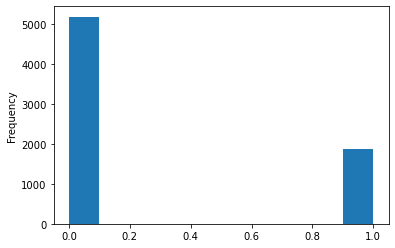

In [21]:
raw_df['Churn'].plot.hist()

## implement smote

In [22]:
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42, k_neighbors=5)
print(X_train.shape)
#X_train, y_train = sm.fit_resample(X_train, y_train)

(5634, 19)


In [23]:
X_train, y_train = sm.fit_resample(X_train, y_train)

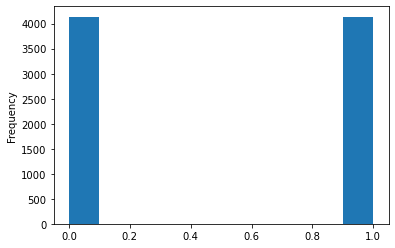

In [24]:
y_train.plot.hist()

In [25]:
# retrain model
m = RandomForestClassifier(n_jobs=-1, n_estimators=25, max_features=0.5)
m.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=25, n_jobs=-1)

In [26]:
m.score(X_test, y_test)

0.7643718949609652

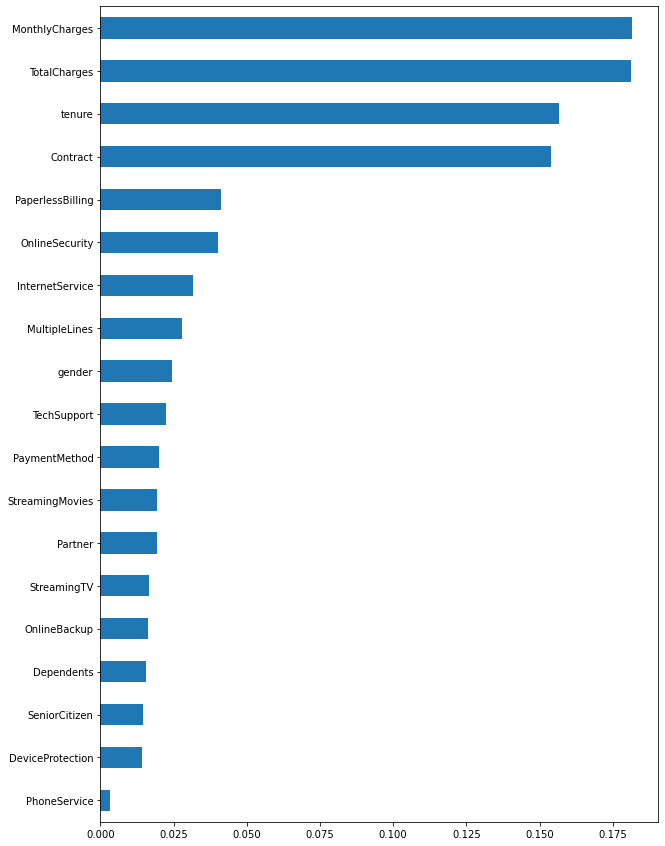

In [27]:
# get feature importances
imp_series = pd.Series(m.feature_importances_, index=X_train.columns).sort_values()
imp_series.plot(kind='barh', figsize=(10,15), sort_columns=True)

## plot distribution of int/float variables

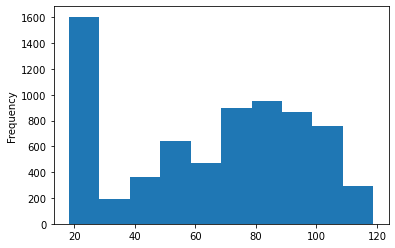

In [28]:
X['MonthlyCharges'].plot.hist()

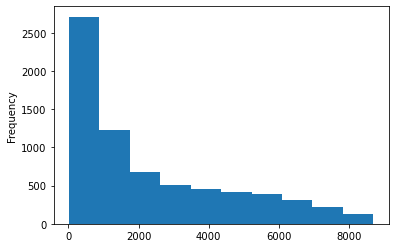

In [29]:
X['TotalCharges'].plot.hist()

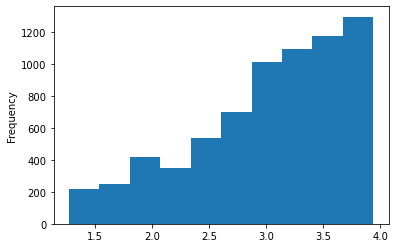

In [30]:
X['TotalCharges'] = np.log10(X['TotalCharges'])
X['TotalCharges'].plot.hist()

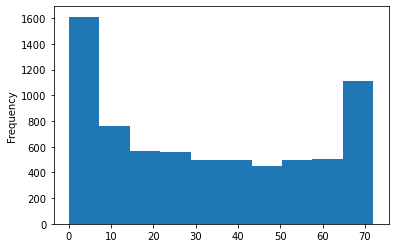

In [31]:
# plot histogram of customer tenure
X['tenure'].plot.hist()

In [32]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# select columns to scale
scale_cols = ['MonthlyCharges', 'tenure', 'TotalCharges']

# create scalar object
ct = ColumnTransformer([
        ('numeric_std_scaler', StandardScaler(), scale_cols)
    ], remainder='passthrough')

# get scaled arr and convert to dataframe
X_scaled_arr = ct.fit_transform(X[scale_cols])
X_scaled_df = pd.DataFrame(X_scaled_arr, columns=scale_cols)

# replace original values with scaled values
X.loc[:, scale_cols] = X_scaled_df.loc[:, scale_cols]

In [33]:
# recreate train test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## refit model - random forest

In [58]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=25, max_features=0.8)
m.fit(X_train, y_train)

RandomForestClassifier(max_features=0.8, n_estimators=25, n_jobs=-1)

In [59]:
m.score(X_test, y_test)

0.7863733144073811

## create new model - SVM

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', probability=True) 
clf = svm.fit(X_train,y_train)
# preds = clf.predict(X_test)
# accuracy_score(y_test, preds)
clf.score(X_test, y_test)

0.8090844570617459

## create new model  - XGBoost

In [37]:
from xgboost import XGBClassifier
xgbm = XGBClassifier()
xgbm.fit(X_train, y_train)
# preds = xgbm.predict(X_test)
# accuracy_score(y_test, preds)
xgbm.score(X_test, y_test)

0.7934705464868701

## evaluate the models

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# generate classification report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score, auc

from scikitplot.metrics import plot_roc

def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

==============SVM===============
------ROC------


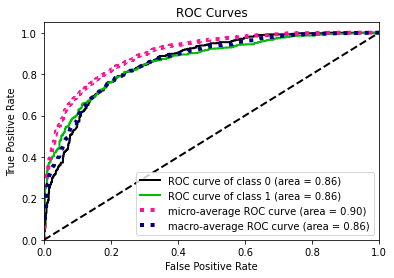

-----classification report-------


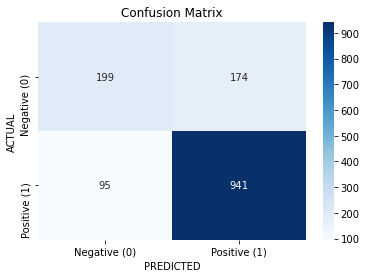

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       373
           1       0.84      0.91      0.87      1036

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [53]:
print("==============SVM===============")
print("------ROC------")
probs = clf.predict_proba(X_test)
plot_roc(y_test, probs)
plt.show() 
print("-----classification report-------")
display(confusion_plot(confusion_matrix(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

==============RandomForest===============
------ROC------


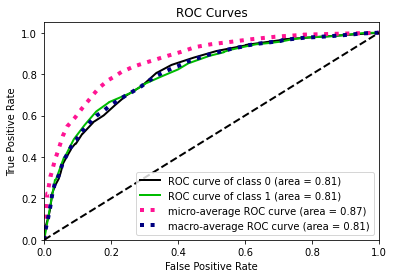

-----classification report-------


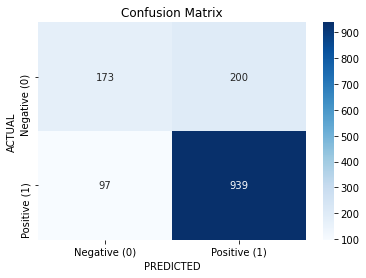

              precision    recall  f1-score   support

           0       0.64      0.46      0.54       373
           1       0.82      0.91      0.86      1036

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [54]:
print("==============RandomForest===============")
print("------ROC------")
probs = m.predict_proba(X_test)
plot_roc(y_test, probs)
plt.show() 
print("-----classification report-------")
display(confusion_plot(confusion_matrix(y_test, m.predict(X_test))))
print(classification_report(y_test, m.predict(X_test)))

==============XGBoost===============
------ROC------


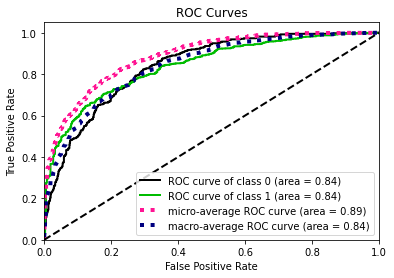

-----classification report-------


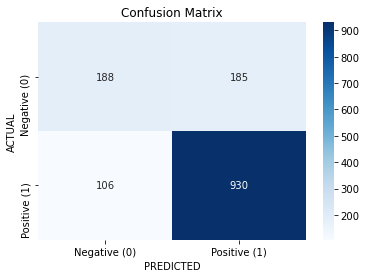

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       373
           1       0.83      0.90      0.86      1036

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [55]:
print("==============XGBoost===============")
print("------ROC------")
probs = xgbm.predict_proba(X_test)
plot_roc(y_test, probs)
plt.show() 
print("-----classification report-------")
display(confusion_plot(confusion_matrix(y_test, xgbm.predict(X_test))))
print(classification_report(y_test, xgbm.predict(X_test)))

## All three models have more or less fall the same accuracy - but we can choose SVM as the final models since they have the best precision to predict churn